# Prediksi Pendapatan Gaji

Prediksi pendapatan gaji ini adalah berdasarkan pengalaman dalam bulan dan gaji bekerja dalam ribuan



## Install Library

Langkah pertama adalah install library seperti pandas untuk manipulasi data, matplotlib untuk membuat grafik data, scikit-learn untuk melakukan pembuatan model linear regression

In [1]:
!pip install pandas matplotlib scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Membaca Dataset
Selanjutnya adalah membaca dataset dengan library pandas

In [2]:
import pandas as pd

file_path = 'dataset/exp_salary.csv'
data = pd.read_csv(file_path)
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


Dilihat dari gambar diatas terdapat data mengenai gaji serta atribut lainnya

## Cleaning Data

Pada tahap ini dilakukan Cleaning Data dengan dapat melakukan pengecekan data yang kosong

In [3]:
data.isnull().sum()

exp(in months)          0
salary(in thousands)    0
dtype: int64

Setelah melihat hasil pengecekan data null seperti diatas maka dapat dilakukan pengecekan data yang duplikasi 

In [4]:
data[data.duplicated()]

,exp(in months),salary(in thousands)


Setelah melakukan pengecekan apakah dataset tersebut terdapat duplikasi maka dapat dicek kembali data tersebut

In [5]:
data

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


## Melihat Deskripsi Data

Dapat dilakukan untuk melihat jumlah untuk dihitung dan rata-rata serta informasi lainnya mengenai data yang akan dianalisa seperti dibawah ini.\
Data ini nantinya akan digunakan sebagai pelatihan model machine learning yang akan dibangun.

In [6]:
data.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


Secara statistika diatas kita dapat memiliki data yang akan digunakan, setelah mengetahui statistika ini dapat dilakukan visualisasi data.

## Visualisasi Data

Dengan library `matplotlib` maka dapat dilakukan visualisasi semua data untuk melakukan apakah data ini dapat dianalisa dengan Linear Regression

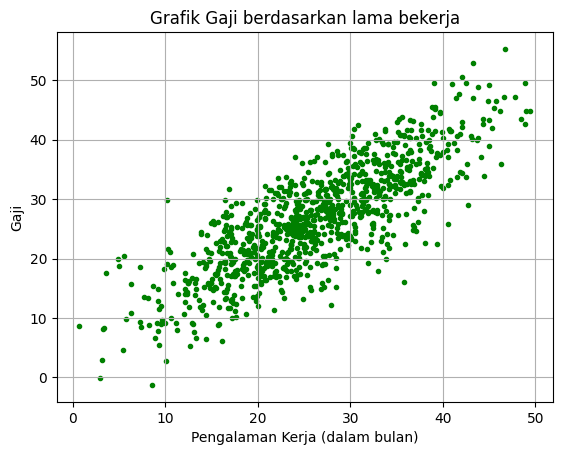

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data['exp(in months)'],data['salary(in thousands)'],color="g",marker=".")

plt.xlabel("Pengalaman Kerja (dalam bulan)")
plt.ylabel("Gaji")
plt.title("Grafik Gaji berdasarkan lama bekerja")
plt.grid(True)
plt.show()

Dari graphic diatas dapat dilihat distribusi data yang terlihat bahwa pengalaman yang lebih lama relatif memiliki gaji yang lebih tinggi

## Training Model

Setelah melihat grafik diatas maka data dapat digunakan untuk percobaan linear regression.

**1. Data tersebut diubah menjadi data training dan data testing**

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,1]

**2. Dengan melakukan import library `sklearn` menggunakan method `train_test_split` seperti dibawah ini dan menghitung shape**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
print("Training set shape - X:", x_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", x_test.shape, " y:", y_test.shape)

Training set shape - X: (800, 1)  y: (800,)
Testing set shape - X: (200, 1)  y: (200,)


**3. Setelah membagikan data maka dapat dilakukan training model tersebut dengan Linear Regression seperti dibawah ini.**

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**4. Melihat Hasil Prediksi**

In [11]:
y_predict=model.predict(x_test)
y_predict

array([19.66863399, 45.08678533, 35.09556678, 41.44573867, 33.15289438,
       24.12144349, 21.29591289, 10.46870976, 40.50939007, 42.35826405,
       19.16657657, 26.00329849, 22.58129684, 19.2972577 , 21.57399671,
       25.95065996, 17.07487093, 31.3434879 , 26.31564914, 22.11001181,
       20.27144837, 15.18674028, 36.65106869, 21.65136797, 18.85699941,
       23.5741666 , 21.25128573, 19.81686519, 18.49274792, 19.21245492,
       24.49091836, 19.23170352, 30.79789779, 15.41236172, 23.24819625,
       18.65734084, 18.31147241, 25.31848616, 24.6406015 , 26.47563134,
       31.11773559, 31.60390297, 28.99809305, 10.50578596, 25.78821205,
       23.68142045, 22.02798674, 30.91711705, 33.08595434, 26.17864447,
       22.87081236, 36.30538907, 20.84080714, 29.35040008, 32.11744359,
       17.50080895, 21.46432741, 20.81449961, 25.59644448, 12.72367189,
       18.92609074, 29.68785329, 26.57001426, 24.42351469, 33.88428266,
       45.24359517, 19.37369379, 16.61669506, 19.58502282, 18.19

In [12]:
x_predict=model.predict(x_train)
x_predict

array([20.93936788, 21.69796408, 14.13834236, 27.49931213, 30.81384577,
       30.59215808, 33.95622669, 30.71317223, 33.64920459, 32.49477918,
       17.12510951, 24.94104596, 29.58422001, 23.95260138, 29.13302023,
       35.32456543, 13.99461117, 20.7175705 , 28.54280551, 29.80856685,
       23.91356807, 12.81575374, 27.42343021, 30.19908015, 21.07440356,
       34.15094257, 21.30636011, 28.35553165, 18.48927556, 30.88589456,
       24.79765097, 35.11533253, 35.88959873, 18.87084477, 33.13693243,
       33.85660469, 38.30643081, 21.84363911, 21.99770519, 18.31135425,
       27.76744418, 27.78613449, 26.16325341, 29.03034575, 26.84391904,
       23.95015699, 28.4772189 , 26.78905876, 33.68493791,  9.88954911,
       23.02168855, 24.48078221, 20.88559601, 30.71446478, 18.94465484,
       15.95945364, 28.10019209, 26.51149834, 18.57357642, 18.17560336,
       33.34114989, 27.21519943, 22.02873068, 19.68059914, 41.91746486,
       34.62808115, 25.63132636, 19.24295243, 24.62188842, 20.26

**5. Membuat Data Frame untuk nilai aktual dan nilai prediksi**

In [13]:
new_df=pd.DataFrame({"Actual":y_test,"Predict":y_predict})
new_df

,Actual,Predict
993,12.404925,19.668634
859,42.641924,45.086785
298,32.613985,35.095567
553,42.598531,41.445739
672,34.519670,33.152894
...,...,...
679,31.147866,34.995008
722,35.924525,34.129958
215,40.378456,35.523578
653,37.678016,31.801034


## Visualisasi Hasil Pembagian Dataset

Dengan membuat regression line dengan cara membuat koefisien dari data dan intercept dari dataset untuk melihat garis tengah dari distribusi data training maupun testing

In [24]:
slope = model.coef_[0]
intercept = model.intercept_

### Visualisasi Training Dataset

Setelah membuat regression line maka dapat dilakukan visualisasi untuk training dataset seperti dibawah ini

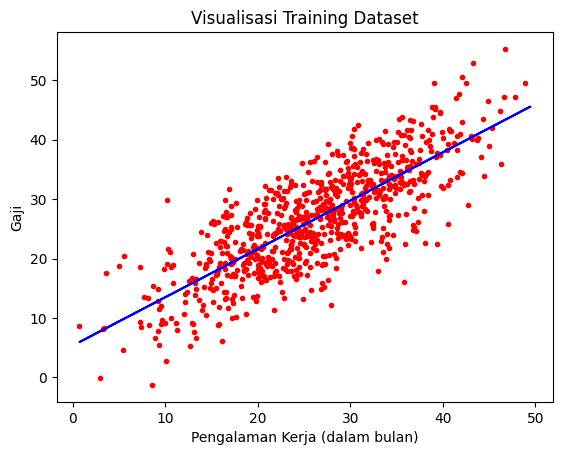

In [25]:
plt.plot(x, intercept + slope * x, color='b')
plt.scatter(x_train,y_train,color="r",marker=".")
plt.title("Visualisasi Training Dataset")
plt.xlabel("Pengalaman Kerja (dalam bulan)")
plt.ylabel("Gaji")
plt.show()

#### Plotting Test Dataset

Setelah membuat regression line maka dapat dilakukan visualisasi untuk test dataset seperti dibawah ini

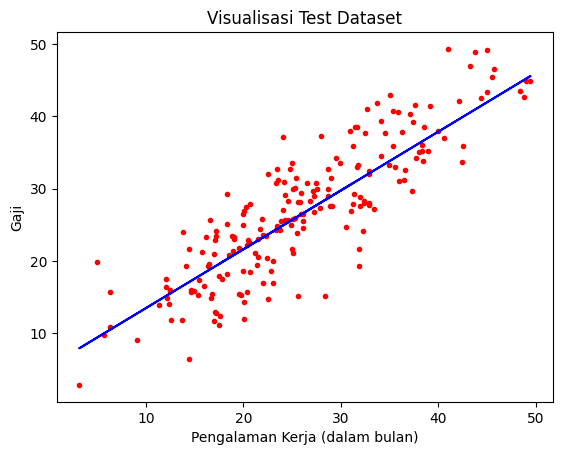

In [26]:
plt.plot(x_test, intercept + slope * x_test, color='b')
plt.scatter(x_test,y_test,color="r",marker=".")
plt.title("Visualisasi Test Dataset")
plt.xlabel("Pengalaman Kerja (dalam bulan)")
plt.ylabel("Gaji")
plt.show()

## Hasil Model

Setelah melakukan visualisasi model maka dapat dilakukan analisa hasil pelatihan model dengan melihat score.

### Training Score

In [17]:
training_score = model.score(x_train,y_train)*100

print(f"Hasil Model Training adalah {training_score}")

Hasil Model Training adalah 63.152747108107675


### Testing Score

In [18]:
testing_score = model.score(x_test,y_test)*100

print(f"Hasil Model Training adalah {testing_score}")

Hasil Model Training adalah 74.6188470890027


## Akurasi Model

Setelah membuat model maka akan dilakukan pengecekan akurasi dengan menggunakan beberapa metrik sesuai dengan https://scikit-learn.org/stable/modules/model_evaluation.html|


### Mean Squared Error

di sisi lain, adalah rata-rata kotak kesalahan. Ini adalah metrik yang lebih umum daripada MAE karena menghukum kesalahan besar lebih karena operasi squaring.

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_predict)
hasil_mse=np.sqrt(mean_squared_error(y_test,y_predict))

print(f"Hasil MSE adalah {hasil_mse}")

Hasil MSE adalah 4.73321799876635


### Mean Absolute Error

MAE adalah ukuran besarnya rata-rata kesalahan dalam satu set prediksi, tanpa mempertimbangkan arah mereka. Ini adalah rata-rata atas sampel uji perbedaan absolut antara prediksi dan pengamatan aktual di mana semua perbedaan individu memiliki berat yang sama. Ini memberikan indikasi bagaimana salah prediksi.

In [20]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predict)

print(f"Hasil MSE adalah {mae}")

Hasil MSE adalah 3.720236310827896


### R2 Score

Juga dikenal sebagai koefisien determinasi, adalah ukuran statistik yang menunjukkan proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen dalam model regresi. Secara sederhana, ini menunjukkan seberapa baik model regresi cocok dengan data.

In [21]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)*100
print(f"Hasil R2 Score adalah {r2}")

Hasil R2 Score adalah 74.6188470890027
